# CS541: Applied Machine Learning, Spring 2025, Problem Set 3
### _Note: Do not delete or add blocks, do not change the function names. If you do this the autograder won't run properly and you might get a 0. Avoid using global variables inside your function. Failing to define your variables correctly could result in a score of 0._

Problem set 3 is due in Gradescope on **Mar 27 at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **103 points** (**53 pts** coding, and **50 pts** short answer).  Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps3.py** and a pdf file named **ps3.pdf** in order to submit it. Additionally, upload all your typed codes (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be three separate submission links for the assignment:
1. Submit **ps3.py** to `PS3-Code`
2. Submit **ONLY your typed code** to `PS3-Typed Code`.
  + The .py file should contain **ONLY your typed code** (Do not include any other code apart from what you coded for the assignment).
  + The .py should not contain any written answers. Only the code you wrote.
  + If your typed code falls under a function definition thats predefined by us, **ONLY include your typed code** and nothing else.
  + For each cell block within colab/jupyter that you typed your ocde in, Add 2 new lines ("\n") before pasting your typed code in the .py file.
  + Please name the .py file your actual name.

3. Submit a single `.pdf` report that contains your work for all written questions to `PS3`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. **You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). Failure to follow these instructions will result in a loss of points.**
  


**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.


**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.


**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

In [1]:
## import some libraries
import sklearn
from sklearn import datasets
import numpy as np
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from tqdm import tqdm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# **Question 1.** Linear Regression (*15 total points*)

## **1.1 Code:** Linear Regression using Sklearn *(5 pts)*

In this section, we will work with a demo dataset. The data consists of 2 columns: `hours_practice` (number of hours to practice) and `score`.

In [2]:
## Read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/linear_data.csv")
print("data shape:", df.shape)
df.sample(4)

data shape: (100, 2)


,hours_practice,score
80,56.901215,80.207523
95,50.030174,81.536991
83,59.049741,77.634183
16,44.687196,82.892504


In [3]:
## Extract features and labels as numpy arrays
X = df.values[:,0:1]  # features
y = df.values[:,1]  # labels

<Axes: xlabel='hours_practice', ylabel='score'>

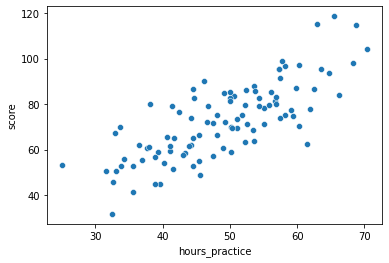

In [4]:
## Plot the dataset
sns.scatterplot(data=df, x="hours_practice", y="score")

In this section, we will train a Linear Regression model on the dataset using Sklearn.
You can refer to the document of Linear Regression [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [5]:
from sklearn.linear_model import LinearRegression

def question_1_1(X: np.ndarray, y: np.ndarray) -> LinearRegression:
    """
    Train a Sklearn's Linear Regression model on features `X` and labels `y`.
    X: 2d numpy array, shape of (num_samples, feat_dim)
    y: numpy array, shape of (num_samples, )
    return a trained Linear Regression model

    """
    # Write your code in this block -----------------------------------------------------------
    model = LinearRegression()
    model.fit(X, y)
    # End of your code -----------------------------------------------------------

    return model


Model slope:     [1.32243102]
Model intercept: 7.991020982270399


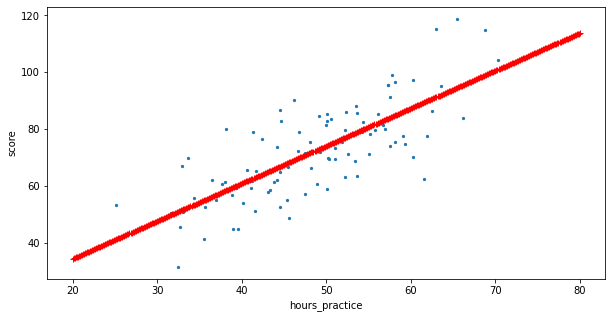

In [6]:
## Test your model
def plot_model(linear_model, X, y, start, end):
    print("Model slope:    ", linear_model.coef_)
    print("Model intercept:", linear_model.intercept_)

    xfit = np.linspace(start, end, 500)[:, np.newaxis]
    if len(linear_model.coef_) == 2:
        xfit = np.concatenate([xfit, xfit**2], axis=1)
    yfit = linear_model.predict(xfit)

    plt.figure(figsize=(10,5))
    plt.scatter(X[:,0], y, s=5)
    plt.xlabel("hours_practice")
    plt.ylabel("score")
    plt.plot(xfit[:,0], yfit, 'r+')

# Get your model
linear_model = question_1_1(X, y)

# Plot: Your regression line is the red line as shown below
start, end = 20, 80  # start and end of the line
plot_model(linear_model, X, y, start, end)

## **1.2 Code:** Polynomial features *(5 pts)*

Let's take a look at another demo dataset

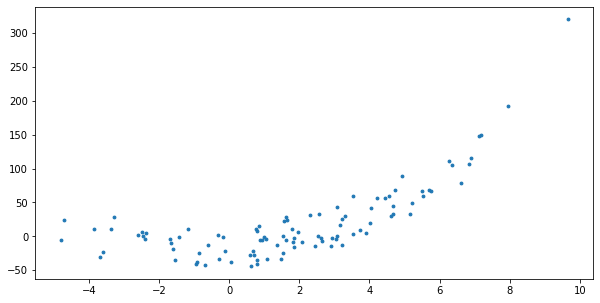

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/polynomial.csv").values
X2, y2 = data[:,:1], data[:,1]
plt.figure(figsize=(10,5))
plt.scatter(X2, y2, s=8)

We can see that the dataset is not linear. In other words, using a line can not capture the pattern in the data, resulting in underfitting. To solve this, we need to make our model a bit more complex.

There is a trick we can use to capture nonlinear relationships between variables: We first transform existing feature by some basic function, then use the generated data as new feature.

For example, with a linear regression for 1-d feature $x$:

$$Y=\theta_0+\theta_1 x$$

We can transform the input feature $x$ to get a new feature, such as $x$ squared and consider it as a new feature.
We now have 2 features, and the model becomes polynomial regression:

$$Y=\theta_0+\theta_1 x+\theta_2 x^2$$

We can keep adding: $$Y=\theta_0+\theta_1 x+\theta_2 x^2+ \theta_3 x^3 + ....$$ to get even more complex model.

You will need to write a function to concatenate $X^2$ as a feature alongside X. So, now, the training data `X_new` will have X and $X^2$ as the features

In [8]:
def question_1_2(X: np.ndarray) -> np.ndarray:
    """
        Given numpy array X, shape of (num_sample, 1).
        Return a numpy array, shape of (num_sample, 2) by adding a new column to the right of X.
        The new column is the square of the existing column in X
    """
    # Write your code in this block -----------------------------------------------------------
    X_squared = X ** 2
    X_new = np.hstack((X, X_squared))
    return X_new
    # End of your code -----------------------------------------------------------


## Test your function
X_new = question_1_2(X2)
print("X_new.shape", X_new.shape)
print(X_new[:5]) # show the first 5 samples

X_new.shape (100, 2)
[[-3.29215704 10.83829796]
 [ 0.79952837  0.63924562]
 [-0.93621395  0.87649656]
 [-4.7226796  22.30370258]
 [-3.60267397 12.97925974]]


Model slope:     [2.60168213 2.76791169]
Model intercept: -20.63185125272492


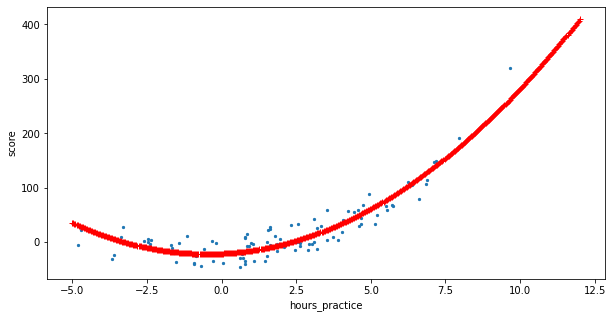

In [9]:
## Plot the new model (in red)
new_linear_model = question_1_1(X_new, y2)
plot_model(new_linear_model, X_new, y2, start=-5, end=12)

We can see the curve fits the data much better than a straight line.

## **1.3 Short answer:**  Linear model *(5 pts)*
**Question:**
    What is the shape of the curve (linear, or non-linear?)
    Is the model still considered to be a linear model?

The curve is non linear because adding $X^2$ allows the model to capture the bend in the data. However, the model is still a linear model because it remains linear in the parameters $\theta$, even though the input is non-linear.

# Question 2. Linear Regression with Regularization *(15 total points*)

With basis functions, our model become more flexible, but it comes with a cost: The model is easier to over-fitting. One way to reduce overfitting is to penalize higher degree polynomials. This ensures that we only use the higher degree polynomials if the error is significantly reduced compared to a simpler model.

In this section, we will work on Boston Housing dataset. This dataset was taken from the [StatLib library](http://lib.stat.cmu.edu/datasets/) which is maintained at Carnegie Mellon University. It consists of 13 continous features and a numerical target named *MEDV*. For more details about the dataset, you can refer [this link](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/boston_housing_name.txt).

Our goal is to train a linear regression model with regularization to learn the relationship between suburb characteristics and house prices.


In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps3/boston_housing.csv")
print("df.shape", df.shape)
df.sample(5)

df.shape (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68,9.7
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244.0,15.9,386.34,3.11,44.0
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8


In [11]:
## Extract features and labels as numpy arrays
X, y = df.iloc[:, :-1], df.iloc[:, -1]

## Split to train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Check on the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


Sklearn provides a useful module named [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which comes in handy when we need to perform sequence of different transformations.

An Example of using Pipeline is shown as below. We want to normalize the data, then create some new polynomial
features, and finally a Linear model. Sklearn provides us
[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for generating polynomial and interaction features.

In [12]:
##
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Steps is a list of Tuple[step_name, transformation_object]
steps = [
    ('scalar', StandardScaler()),   ## normilaze data
    ('poly', PolynomialFeatures(degree=2)),  ## add new features up to 2 degrees
    ('model', LinearRegression()) ## Linear regression model
]

linear_pipe = Pipeline(steps)
linear_pipe.fit(X_train, y_train)

## Let's see how we perform on the training and test sets
print('Training score: {}'.format(linear_pipe.score(X_train, y_train)))
print('Test score: {}'.format(linear_pipe.score(X_test, y_test)))

Training score: 0.9425939451762557
Test score: 0.6073241275695936


On training set, the model performs very well, but the score drops significantly on test set.
This suggests that our model is overfitting.

Now regulirization comes for the rescue.

Recall that there are three main techniques for regularization in linear regression, where we add a regularization term to the loss:

+   Lasso Regression (L1 regularization):   $\alpha \sum_{j=1}^n\left|\theta_j\right|$
+   Ridge Regression (L2 regularization):   $\alpha \sum_{j=1}^n\left|\theta^2_j\right|$
+   Elastic Net (Combine L1 and L2 regularizations):     $\alpha_1 \sum_{j=1}^n\left|\theta_j\right| + \alpha_2 \sum_{j=1}^n\left|\theta^2_j\right|$

Where $n$ is the number of features, $\alpha$ is regularization parameter, which controls the degree of regularization.

In Sklearn, we can use `sklearn.linear_model.Lasso` for Linear Regression with L1 regularization. It also provides `sklearn.linear_model.Ridge` and `sklearn.linear_model.ElasticNet` for the other 2.

Similar to what we have done above, you should be able to perform a Linear Regresison with regularization.

Complete the function below for Lasso and Ridge regression by using the code example above. In the function, you should define **`steps` the same as we use in the example:** First, a "scalar", then "poly" followed by a "model". The only thing different here is the model (`Lasso` and `Ridge`, instead of `LinearRegression`)

## **2.1 Code:** Lasso and Ridge *(8 pts)*

In [13]:
from sklearn.linear_model import Ridge, Lasso

def question_2_1(regularization: str, alpha_1: float, alpha_2: float,
                X_train, y_train, X_test, y_test) -> Tuple[float, float]:
    """
        regularization: one of ["L1", "L2"]. If "L1", use Lasso, otherwise use Ridge.
        alpha_1: regularization for Lasso (if Lasso is used)
        alpha_2: regularization for Ridge (if Ridge is used)
        X_train, y_train, X_test, y_test: numpy arrays, shapes (354, 13), (354,), (152, 13), (152,) respectively
        return a Tuple: (train_score, test_score) in that order,
        Note that train_score and test_score are float numbers in range [0,1]
    """
    # Write your code in this block -----------------------------------------------------------
    # You should define `steps` the same as we use in the example above:
    #       first a "scalar", then "poly" followed by a "model".


    ## Don't forget to return train and test scores!
    if regularization == "L1":
        model = Lasso(alpha=alpha_1)
    else:
        model = Ridge(alpha=alpha_2)
    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', model)
    ]

    linear_pipe = Pipeline(steps)
    linear_pipe.fit(X_train, y_train)
    train_score = linear_pipe.score(X_train, y_train)
    test_score = linear_pipe.score(X_test, y_test)
    return train_score, test_score
    # End of your code -----------------------------------------------------------

In [14]:
## Test your model
alpha_1 = 0.1
alpha_2 = 12
for regularization in ["L1", "L2"]:
    train_score, test_score = question_2_1(regularization, alpha_1, alpha_2,
                                                         X_train, y_train, X_test, y_test)
    print(f"regularization: {regularization}, train_score: {train_score}, test_score: {test_score}")



regularization: L1, train_score: 0.9070657101514069, test_score: 0.8055776105496002
regularization: L2, train_score: 0.9304830234444311, test_score: 0.80790871195353


## **2.2 Short answer:** Regularization Effects *(7 pts)*

coefficients of Lasso


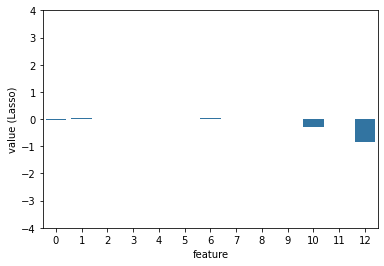

coefficients of Ridge


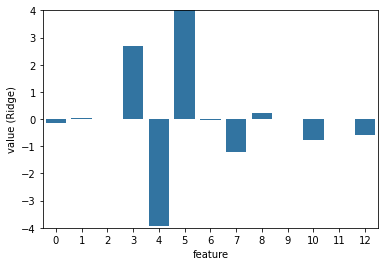

In [15]:
alpha = 3
lasso = Lasso(alpha).fit(X_train, y_train)
ridge = Ridge(alpha).fit(X_train, y_train)

# Here the input feature dimension is 13 (we are using X_train and not the degree 2 polynomial features.)
# Recall that regularization will affect the coeffiecient placed on the features while making the prediction.
# Let's see how the coefficients look like with Lasso and Ridge.

coefficients = pd.DataFrame({"feature": list(range(len(lasso.coef_))), "value (Lasso)": lasso.coef_, "value (Ridge)": ridge.coef_})

## coefficients of Lasso
ax = sns.barplot(data=coefficients, x="feature", y="value (Lasso)")
ax.set( ylim=(-4, 4)) ## set  min, max for the y-axis
print("coefficients of Lasso")
plt.show()

## coefficients of Ridge
ax = sns.barplot(data=coefficients, x="feature", y="value (Ridge)")
ax.set( ylim=(-4, 4)) ## set  min, max for the y-axis
print("coefficients of Ridge")
plt.show()

**Question:**

**1. Compare the performance of the model with and without regularization.**

**2. Compare the coefficients when using Lasso and Ridge.**

**3. How does alpha in Lasso and Ridge affect the coefficients and performance? (i.e., what happens if we use very tiny alpha, or very large alpha? You can play around with some values of alpha by changing the value `alpha=3` or in `alpha_1` and `alpha_2` above to get an intuition for this.)**


1. Without regularization, the model tends to overfit, performing well on training data but poorly on unseen data. Regularization helps by reducing large coefficients, making the model less sensitive to noise. This usually results in a lower training score but a higher test score, improving generalization.

2. Lasso shrinks some coefficients to exactly zero, effectively selecting only a few features, as seen in the plot where most coefficients are zero except for a few. In contrast, Ridge reduces the magnitude of all coefficients but does not set any to zero, which is evident in the plot where all features still have some nonzero value. This means Lasso performs feature selection, while Ridge retains all features but shrinks them to prevent overfitting.

3. The regularization parameter α controls how strongly Lasso and Ridge penalize large coefficients:

    * Tiny α: The penalty is really small, so both Lasso and Ridge behave like ordinary linear regression, resulting in large coefficients and a high risk of overfitting. The training score remains high, but the test score often drops due to poor generalization.
    
    * Large α: Strong regularization forces coefficients to shrink. In Lasso, most coefficients become exactly zero, discarding important features. In Ridge, coefficients shrink but remain nonzero, preventing overfitting while still utilizing all features.

## **2.3 Short answer:** Regularization Effects 2 *(3 pts)*

Suppose we know that only a few features are informative, while most are irrelevant (i.e., the data is sparse). Which regularization technique works best in this case?
Explain your reasoning with examples. Hint: If we have 100 features but only 5 are important, how will Lasso and Ridge handle them differently?

Lasso works best when only a few features are important because it applies L1 regularization, forcing irrelevant feature coefficients to zero. For example, if only 5 out of 100 features are useful, Lasso will eliminates the other 95, while Ridge will shrink all coefficients but keep them nonzero. This makes Lasso better for sparse data, i.e., many "useless" features.

## **2.4 Short answer:** Feature Selection in Linear Regression *(5 pts)*
1. Inspect each feature in the Boston Housing dataset and explain its relationship with the target variable *without using dimensionality reduction algorithms such as PCA*. Do you observe any distinct patterns? How can we simply & effectively analyze the relationships and characteristics of the dataset?

2. Suppose we have computational limitations and can only use a subset of the dataset. Which two features should we choose for a linear regression model? Explain your reasoning.


1. We can analyze each feature’s relationship with the target variable MEDV using correlation analysis. Features like RM (average number of rooms) show a positive correlation with MEDV, meaning houses with more rooms tend to be more expensive. In contrast, LSTAT (lower-income percentage) and CRIM (crime rate) show negative correlations, indicating that higher crime rates and poverty levels are linked to lower house prices. A simple way to analyze these relationships is by plotting a correlation heatmap as we show below.
![Feature Relationships](pcor.png)

2. Based on the plotted heatmap, RM and LSTAT are the best two features for a linear regression model. RM has the strongest positive correlation with the target variable (0.70), while LSTAT has the strongest negative correlation (-0.74), making them the most predictive features.

# **Question 3.** Regression Trees  (*30 total points*)

In the first two sections, we will work on UK Used Car dataset. The dataset was adapted from [Kaggle's Data](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/code?datasetId=750216&sortBy=voteCount). It contains information of the car such as price (in £), transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size. For more details about the dataset, you can refer to [this link](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes).

Our goal is to train a regression tree to predict the price of a used car, given other information.

First, let's read the dataset

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps4/used_car_price.csv")
print(df.shape)
df.head()

(4960, 10)


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


A regression tree is like a classification tree, but a regression tree stores values rather than labels in the leaves. The tree is fitted using a procedure quite like fitting a classification tree. The splitting process parallels the one we used for classification, but now we can use the error in the regression to choose the split instead of the information gain.

## **3.1 Code:** Label encoder *(10 pts)*

We can observe that some columns (e.g., "brand", "model") contain string values, not numbers.
In order to use Sklearn's regression tree, we need to convert these strings into numbers first.

There are some options for this, such as [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder), [OrdinalEncoder](https://scikit-learn.org/sOrdinalEncodertable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder).

In this section, we will use [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). The idea is that, for each string value, we map it to a integer number. For example, suppose we have total 3 car brands in column "brand": ["audi", "bmw", toyota"], it can be mapped to integers number as follows:  
         "audi" -> 0, "bmw" -> 1, "toyota" -> 2

You will need to complete the function below, using  [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [19]:
from sklearn import preprocessing

def question_3_1(columns: List[str], df: pd.DataFrame) -> pd.DataFrame:
    """
    label encode for categorical columns.
    columns: list of categorical columns needed to encode
    df: Pandas dataframe
    return a Pandas dataframe (same shape as input) where each col in `columns` gets encoded.

    """
    # Write your code in this block -----------------------------------------------------------
    for col in columns:
        le = preprocessing.LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

    # End of your code -----------------------------------------------------------

### Test your function
categorical_columns =  ['brand', 'model', 'transmission', 'fuelType']

df = question_3_1(categorical_columns, df)
df.head(10)

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,3,69,2019,3,4223,0,145.0,39.8,2.2,31995
1,7,30,2015,1,47870,0,125.0,60.1,2.0,7700
2,0,58,2019,0,5151,4,145.0,29.1,2.9,58990
3,8,71,2016,0,20423,0,30.0,57.6,2.0,12999
4,5,70,2020,3,3569,4,145.0,47.1,1.0,16990
5,4,77,2019,0,4170,0,145.0,44.1,2.1,40890
6,6,53,2020,0,3,2,135.0,64.2,1.8,25990
7,1,48,2019,3,101,4,145.0,34.0,3.0,41980
8,6,19,2019,0,6340,2,135.0,52.3,2.5,25490
9,2,42,2012,1,85843,4,30.0,57.7,1.2,3491


## **3.2 Code:** Regression Tree *(10 pts)*

In [20]:
### Prepare data
X = df.drop(columns="price")
y = df["price"]

## Split to train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.3)

## Check on the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3472, 9) (1488, 9) (3472,) (1488,)


We will train a Regression Tree on the dataset using Sklearn.
You can refer to the document of DecisionTreeRegressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
You should take a look at the document, to see what parameters it provides and understand their meaning.


In [21]:
from sklearn.tree import DecisionTreeRegressor

def question_3_2(X: np.ndarray, y: np.ndarray, random_state: int,
                 max_depth: int, min_samples_split: int) -> DecisionTreeRegressor:
    """
    Train a Sklearn's Regression Tree on features `X` and labels `y`.
    The regression tree has max_depth=`max_depth`, and min_samples_split=`min_samples_split`,
    and set random_state to `random_state` when initializing.

    X: 2d numpy array, shape of (num_samples, feat_dim)
    y: numpy array, shape of (num_samples, )
    random_state: controls the randomness of the model.
    max_depth: The maximum depth of the tree
    min_samples_split: The minimum number of samples required to split an internal node

    return a trained `DecisionTreeRegressor`
    """
    # Write your code in this block -----------------------------------------------------------
    model = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X, y)
    return model
    # End of your code ------------------------------------------------------------------------


## **3.3 Code:** Root mean square error *(5 pts)*


To measure how the model performs, we can evaluate the results on root mean square error (RMSE):

$$
\text{RMSE}=\sqrt{\frac{\sum_{i=1}^N\left(\text {Predicted}_i-\text {Actual}_i\right)^2}{N}}
$$
where N is the number of samples.


RMSE give us an idea of how far predictions fall from measured true values using Euclidean distance:  lower the RMSE better is model performance.

Write a function to compute RMSE

In [22]:
def question_3_3(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute RMSE given predictions and ground-truth labels
    y_true: ground-truth labels, shape (num_samples, )
    y_pred: predictions,  shape (num_samples, )
    return root mean square error
    """
    # Write your code in this block -----------------------------------------------------------
    squared_errors = (y_pred - y_true) ** 2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse
    # End of your code ------------------------------------------------------------------------



## test your function
y_true = np.array([7,8,10])
y_pred = np.array([7,7,8])
question_3_3(y_true, y_pred)

1.2909944487358056

In [23]:
### Test your model in question 1.2

max_depth = 7
min_samples_split = 2
random_state = 2022

print(f"max_depth={max_depth}, min_samples_split={min_samples_split}")
model = question_3_2(X_train, y_train, random_state, max_depth, min_samples_split)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Root Mean Square Error on training set:", question_3_3(y_train, train_pred))
print("Root Mean Square Error on test set:", question_3_3(y_test, test_pred))

max_depth=7, min_samples_split=2
Root Mean Square Error on training set: 4522.931688492328
Root Mean Square Error on test set: 5870.628662511966


Our regression tree has a rmse of around £6k on test set.

## **3.4 Short answer:** Explanation for prediction *(5 pts)*

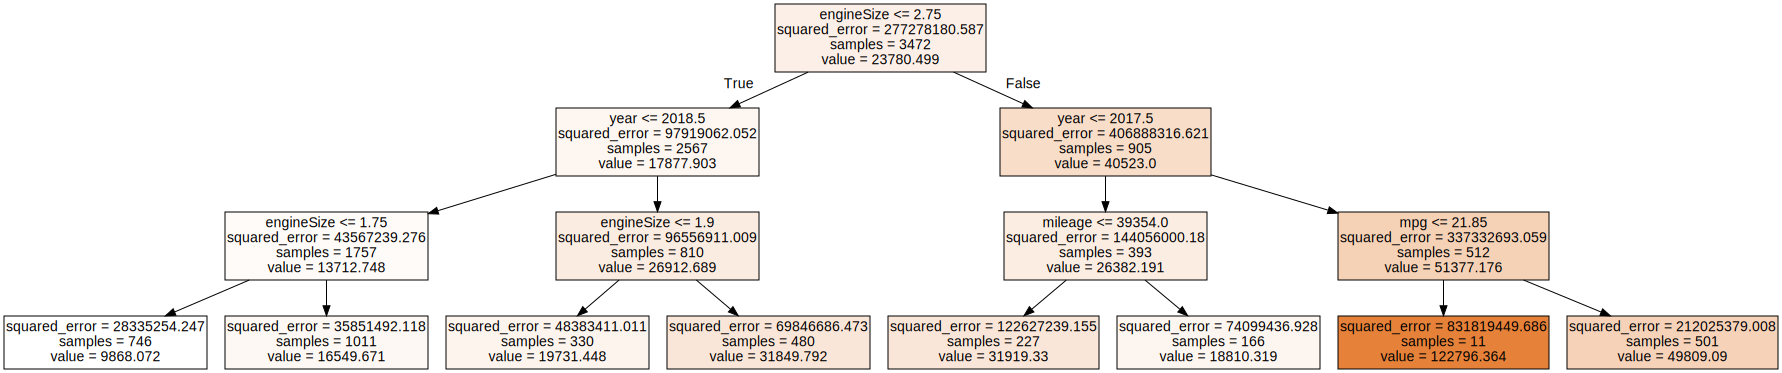

In [26]:
## Visualize a shallow tree (max_depth=3)
## If you're using your local computer, you can use `pip install graphviz`
# and `brew install graphviz` (on MAC) to install the package
from sklearn.tree import export_graphviz
import graphviz

max_depth = 3
model = question_3_2(X_train, y_train, random_state, max_depth, min_samples_split)
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

if you're interested in visualizing tree models, [`dtreeviz`](https://github.com/parrt/dtreeviz) is another cool package can help you with variety of ways to visualize the tree.

Let's say we want to make a prediction for this sample:

In [27]:
## show 1 sample
X_test[13:14]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4929,2,22,2019,3,7055,0,145.0,37.2,2.0


In [28]:
print(f"Actual price of the car: £{y_test.iloc[13]:,}")

## Let's see what the model predicts for the car
print(f"Model predicts for the car: £{model.predict(X_test[13:14])[0]:,.2f}")

Actual price of the car: £30,970
Model predicts for the car: £31,849.79


**Question:** Explain how the decision tree made that prediction by pointing out the path from the root to its leaf.

The Decision Tree first checks engine size (2.0 ≤ 2.75), which is true, so it moves left. Then, since the year is 2019 > 2018.5, it moves right. Next, it checks engine size again (2.0 > 1.9), moving right, reaching a leaf node with a predicted price of £31,849.79.

# **Question 4.** Boosting  (*20 total points*)

Gradient boosting builds a sum of predictors using a greedy stagewise method. First, we fit a predictor to the data to obtain an initial model. Now repeat: Compute the appropriate weight at each data point; then fit a predictor using these weights; search for the best weight with which to add this predictor to the current model; and add the weighted predictor to the current model. Stop by looking at validation error. The weight is a partial derivative of the loss with respect to the predictor, evaluated at the current value of the predictor.

The mystic behind Boosting is in principal the same as for Random Forest models: *A bunch of weak learners which performs just slightly better than random guessing can be combined to make better predictions than one strong learner.*

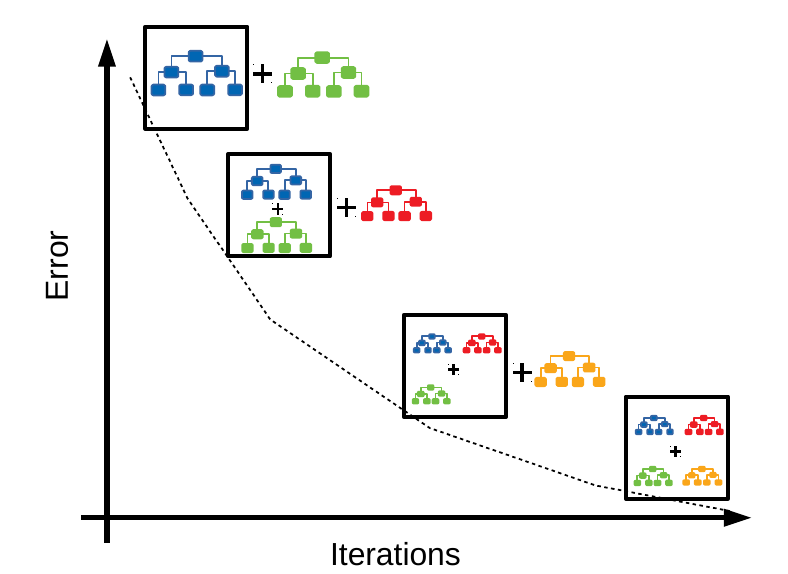

In [29]:
## The idea of gradient boosting tree
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps4/boosting2.png")

Different from the Random Forest approach where we created an ensemble of tree models in parallel, we now create the ensemble in sequence, where the set up of the actual tree is influenced by the outputs of all the previous tree models by altering the weights of the dataset, the tree model is built on.

There are some well-used gradient boosting tree algorithms, such as [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/), [XGboost](https://xgboost.readthedocs.io/en/stable/), and [Catboost](https://catboost.ai/). In this section, we will get into XGboost to see how we can apply it to the used car dataset.


[XGBoost](https://xgboost.readthedocs.io/en/stable/tutorials/model.html), which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It’s a parallelized and carefully optimized version of the gradient boosting algorithm for regression, classification, and ranking problems. XGBoost is one of the go-to algorithms for tabular data due to its efficiency. Some big companies use Xgboost for their prediction models, such as Uber has been [using XGboost for arrival time predictions (ETA)](https://www.uber.com/blog/deepeta-how-uber-predicts-arrival-times/).

Let's train a XGBoost on the used car dataset.

## **4.1 Code:** XGboost *(10 pts)*

For this question, you can refer to the document of `XGBRegressor` [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)

In [30]:
import xgboost as xgb


def question_4_1(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> xgb.XGBRegressor:
    """
        Train a XGBRegressor model on X_train, y_train
        Return a trained xgb.XGBRegressor
    """
    # Write your code in this block -----------------------------------------------------------

    ## Step 1: initialize a `XGBRegressor` object, with objective='reg:squarederror' (loss function),
    # `n_estimators` = 150 (i.e., the number of trees),  `learning_rate`=0.2 and `random_state`=2022
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.2, random_state=2022)


    ## Step 2: fit the model on X_train, y_train
    # In `fit()`, pass (X_train, y_train), (X_test, y_test) as  2 datasets for `eval_set`. You should refer to
    # the document to see how to use `eval_set` with `fit()`
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    ## Step 3: return the trained model
    return model
    # End of your code ------------------------------------------------------------------------


### test your model
xgb_model = question_4_1(X_train, y_train, X_test, y_test)
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)
print("Root Mean Square Error on training set:", question_3_3(y_train, train_pred))
print("Root Mean Square Error on test set:", question_3_3(y_test, test_pred))

[0]	validation_0-rmse:23572.59662	validation_1-rmse:22573.20800
[1]	validation_0-rmse:19211.92984	validation_1-rmse:18518.92220
[2]	validation_0-rmse:15770.24886	validation_1-rmse:15352.98190
[3]	validation_0-rmse:12995.79765	validation_1-rmse:12823.66526
[4]	validation_0-rmse:10794.76078	validation_1-rmse:10866.74189
[5]	validation_0-rmse:9088.29813	validation_1-rmse:9368.48763
[6]	validation_0-rmse:7686.62647	validation_1-rmse:8194.20939
[7]	validation_0-rmse:6609.01522	validation_1-rmse:7330.44907
[8]	validation_0-rmse:5753.89645	validation_1-rmse:6613.45556
[9]	validation_0-rmse:5033.06705	validation_1-rmse:6056.14437
[10]	validation_0-rmse:4509.47279	validation_1-rmse:5688.28536
[11]	validation_0-rmse:4098.16452	validation_1-rmse:5389.23332
[12]	validation_0-rmse:3801.85229	validation_1-rmse:5149.83501
[13]	validation_0-rmse:3516.29859	validation_1-rmse:4931.53893
[14]	validation_0-rmse:3298.57600	validation_1-rmse:4780.02471
[15]	validation_0-rmse:3153.90179	validation_1-rmse:469

We can observe that Xgboost perform much beter than the regression tree (lower RMSE) on this dataset.

## **4.2 Graph:** Plot train and test errors *(5 pts)*
`XGBRegressor` objects have `.evals_result()` which stores all the training and validation losses.


In [32]:
results = xgb_model.evals_result()
print(results.keys())

dict_keys(['validation_0', 'validation_1'])


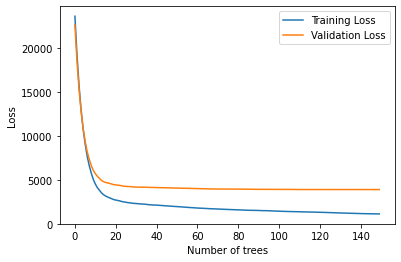

In [36]:
### Generate the code to plot traning loss and validation loss from `results`

def question_4_2(results: Dict) -> None:
    # Write your code in this block -----------------------------------------------------------
    train_loss = results['validation_0']['rmse']
    test_loss = results['validation_1']['rmse']
    
    plt.plot(train_loss, label='Training Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.xlabel('Number of trees')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # End of your code ------------------------------------------------------------------------


## Test your code: You should have a similar plot as below
# No need to be exactly the same (can be different in style, color), but MUST have legend
# Please include the generated plot to the pdf submission file
question_4_2(results)

**Feature Importance**

Generally, feature importance provides a score that indicates how useful or valuable each feature was in the construction of the boosting trees within the model. It gives us a general idea of which features are more importance.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

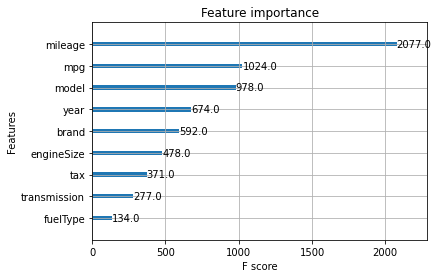

In [37]:
## There are some options for `importance_type`,
# each may return a different result for feature importance
# you can refer to the document of XGBoost for more detail.
xgb.plot_importance(xgb_model, importance_type='weight')

This suggests that "mileage", "model" and "mpg" are the most important features for the xgboost model to predict "price" of a used car in the dataset.

# **Question 5.** Linear regression models (*20 total points*)

At http://www.statsci.org/data/general/kittiwak.txt, you can find an existing dataset
collected by D.K. Cairns in 1988 that analysed the relation between population and foraging area for seabird colonies.

We will use this dataset to fit simple regression models and analyze their performance.

## **5.1 Code:** Fitting regression model (*5 pts*)

**Question**:  Using the 22 data points that you have to copy directly into the following code block from the website, fit a regression line for the relationship between the population size and the log area for the seabird (i.e., kittiwake) colonies. The x-axis should represent the log area, while the y-axis should show the population size.


We will use this dataset to fit simple regression models and analyse their performance.

In [ ]:
from sklearn.linear_model import LinearRegression


##Write your answer/code in this block
# Include this part along with the generated plot in both your .py submission and .pdf submission!

## **5.2 Short answer:** Performance Analysis *(5 pts)*

**Question**: Based on your result from question 5.1 how well does your regression model explains the data? If you had a large island, to what extent would you trust the prediction
produced by this regression? If you had a small island, would you trust the answer more? Why?

Write your answer in this block

**Answer:**

## **5.3 Code:** Plotting regression model without outliers *(5 pts)*

**Question**: Using the same 22 data points, fit a regression model while excluding the two most obvious outliers. You should includes **all 22 data points** in the final plot.


You can use LinearRegression from Sklearn to fit a regression model.

In [ ]:
from sklearn.linear_model import LinearRegression


##Write your answer/code in this block
# Include this part along with the generated plot in both your .py submission and .pdf submission!

## **5.4 Short answer:** Comparing linear regression models *(5 pts)*

**Question**:  Compare the plots from questions 5.1 and 5.2. Based on your linear regression result from question 5.2, which excludes two likely outliers, would you trust the predictions of this regression model more? Why or why not?

Write your answer in this block

**Answer:**

**Congrats! You have reached to the end of Pset3**